<h1>Consumo de cerveja em São Paulo</h1>
<br>
Dataset disponível no <a href='https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo'>Kaggle</a>
<br>
Este conjunto de dados possui variáveis de temperatura máxima, média e mínima, mm de precipitação, consumo de cerveja de acordo com o tempo durante todos os dias de 2015 em São Paulo. Possui também a variável se aquele dia era no final de semana ou não (1 para sim e 0 para não).
<br>
<br>
Farei uma análise exploratória dos dados e em seguida criarei um modelo de machine learning com base em regressão, porém analisarei entre três modelos, são eles: <b>Regressão Linear, Lasso e Ridge.</b>

<h1>Importação das bibliotecas</h1>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Leitura do arquivo
df_principal = pd.read_csv('Consumo_cerveja.csv')
df_principal.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [3]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [4]:
df_principal.shape

(941, 7)

<h1>Tratamento dos dados</h1>
<br>

In [5]:
df_principal = df_principal.dropna(axis=0).reset_index(drop=True)
df_principal.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [6]:
# Alterando os tipos dos dados
df_principal['Data'] = pd.to_datetime(df_principal['Data'])
df_principal['Temperatura Media (C)'] = df_principal['Temperatura Media (C)'].str.replace(',', '.').astype('float64')
df_principal['Temperatura Minima (C)'] = df_principal['Temperatura Minima (C)'].str.replace(',', '.').astype('float64')
df_principal['Temperatura Maxima (C)'] = df_principal['Temperatura Maxima (C)'].str.replace(',', '.').astype('float64')
df_principal['Precipitacao (mm)'] = df_principal['Precipitacao (mm)'].str.replace(',', '.').astype('float64')
df_principal['Final de Semana'] = df_principal['Final de Semana'].astype('int32')
df_principal['Mes'] = df_principal['Data'].apply(lambda x: x.month)
df_principal['Dia'] = df_principal['Data'].apply(lambda x: x.day)

<h1>Correlação entre as variáveis</h1>
<br>

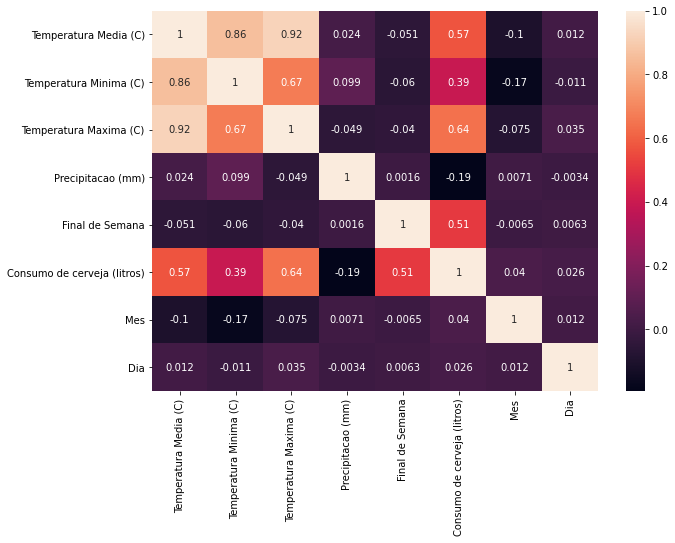

In [7]:
# Verificando correlações entre as colunas
correlacao = df_principal.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlacao, annot=True)
plt.show()

<b>As maiores correlações para a nossa variável alvo (Consumo de cerveja) são as variáveis relacionadas a temperatura e se a data cai no final de semana. Vamos explorar estas correlações na exploração de dados</b>

<h1>Exploração dos dados</h1>
<br>

In [8]:
df_principal.describe()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Mes,Dia
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367,6.526027,15.720548
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143,3.452584,8.808321
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000,1.000000,1.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000,4.000000,8.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000,7.000000,16.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000,10.000000,23.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000,12.000000,31.000000


<h1>Consumo por temperatura</h1>
<br>

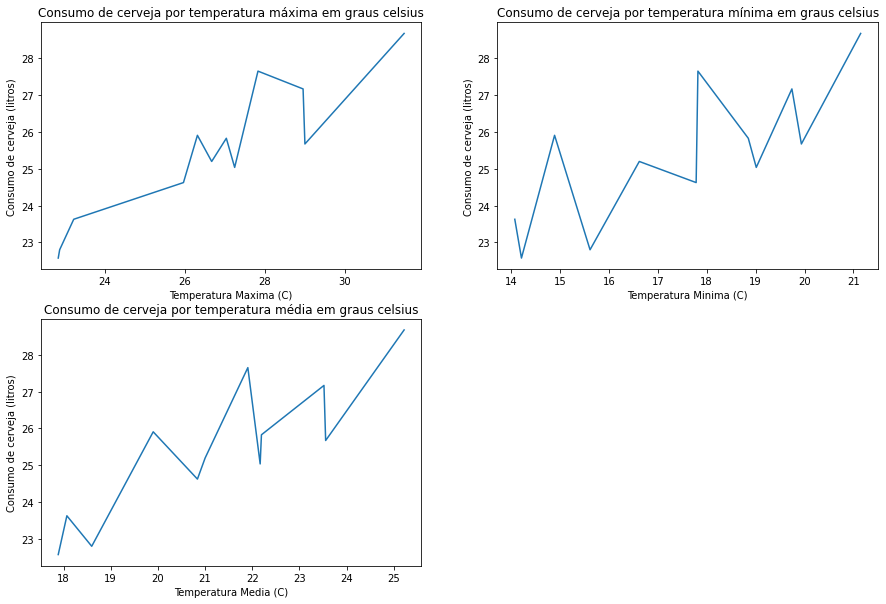

In [9]:
df_mes = df_principal.copy()
df_mes = df_mes.groupby('Mes', as_index=False).mean()

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.lineplot(x='Temperatura Maxima (C)', y='Consumo de cerveja (litros)', data=df_mes, ci=None)
plt.title('Consumo de cerveja por temperatura máxima em graus celsius')

plt.subplot(2, 2, 2)
sns.lineplot(x='Temperatura Minima (C)', y='Consumo de cerveja (litros)', data=df_mes, ci=None)
plt.title('Consumo de cerveja por temperatura mínima em graus celsius')

plt.subplot(2, 2, 3)
sns.lineplot(x='Temperatura Media (C)', y='Consumo de cerveja (litros)', data=df_mes, ci=None)
plt.title('Consumo de cerveja por temperatura média em graus celsius')

plt.show()

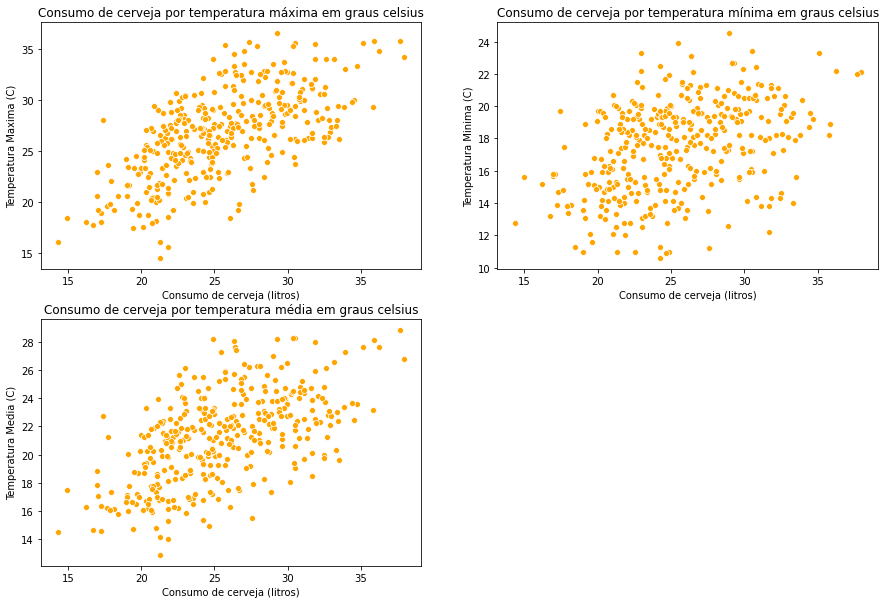

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Consumo de cerveja (litros)', y='Temperatura Maxima (C)', data=df_principal, color='orange')
plt.title('Consumo de cerveja por temperatura máxima em graus celsius')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Consumo de cerveja (litros)', y='Temperatura Minima (C)', data=df_principal, color='orange')
plt.title('Consumo de cerveja por temperatura mínima em graus celsius')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Consumo de cerveja (litros)', y='Temperatura Media (C)', data=df_principal, color='orange')
plt.title('Consumo de cerveja por temperatura média em graus celsius')

plt.show()

<b>Tendência de aumento de consumo de cerveja conforme a temperatura aumenta.</b>

<h1>Consumo de cerveja é maior no fim de semana?</h1>
<br>

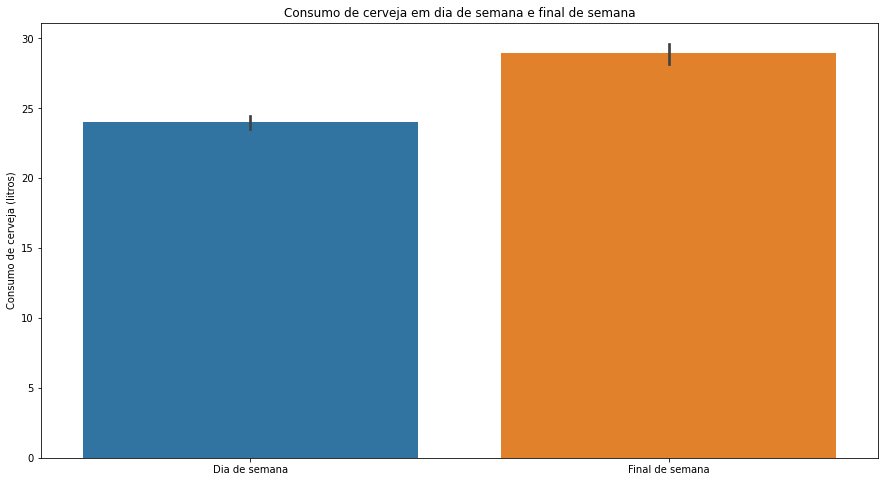

In [11]:
df_fim_de_semana = df_principal.copy()
semana = {0:'Dia de semana', 1:'Final de semana'}
df_fim_de_semana['Final de Semana'] = df_fim_de_semana['Final de Semana'].apply(lambda x:semana[x])
plt.figure(figsize=(15,8))
sns.barplot(x='Final de Semana', y='Consumo de cerveja (litros)', data=df_fim_de_semana)
plt.title('Consumo de cerveja em dia de semana e final de semana')
plt.xlabel(None)
plt.show()

<b>Maior no final de semana</b>

<h1>Consumo médio por dia da semana e mês</h1>
<br>

In [12]:
df_por_dia_e_mes = df_principal.copy()
df_por_dia_e_mes['ano'] = df_por_dia_e_mes['Data'].dt.year
df_por_dia_e_mes['dia da semana'] = df_por_dia_e_mes['Data'].dt.weekday

In [13]:
dia_e_mes = df_por_dia_e_mes.groupby(['dia da semana','Mes']).agg({'Consumo de cerveja (litros)':'mean'}).rename(columns={'Consumo de cerveja (litros)':'freq'}).reset_index()

In [14]:
weekmap = {0:'Seg', 1:'Ter', 2:'Qua', 3:'Qui', 4:'Sex', 5:'Sab', 6:'Dom'}
dia_e_mes['dia da semana'] = dia_e_mes['dia da semana'].map(weekmap)

In [15]:
# Ordenando para que o gráfico fique de maneira correta
dia_e_mes['dia da semana']=pd.Categorical(dia_e_mes['dia da semana'],categories=['Dom','Seg','Ter','Qua','Qui','Sex','Sab'],ordered=True)

In [16]:
dia_e_mes = dia_e_mes.pivot('dia da semana','Mes','freq')

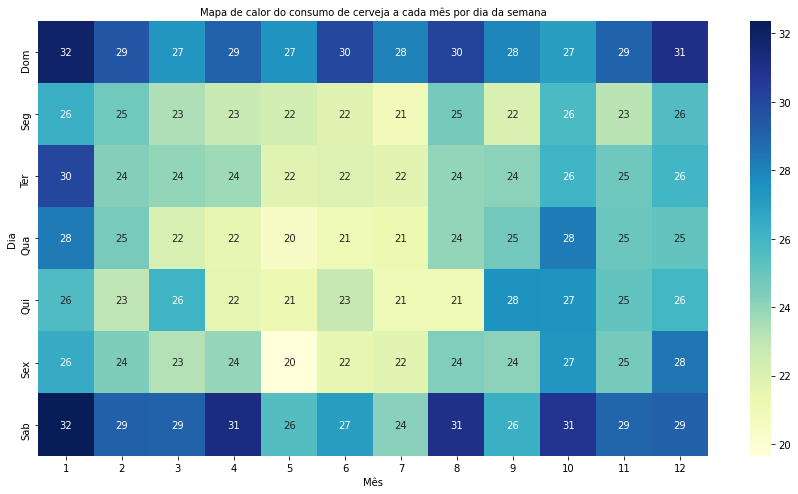

In [28]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(dia_e_mes,annot=True, cmap="YlGnBu")
ax.set_xlabel("Mês")
ax.set_ylabel("Dia")
ax.set_title("Mapa de calor do consumo de cerveja a cada mês por dia da semana",size=10)
plt.show()

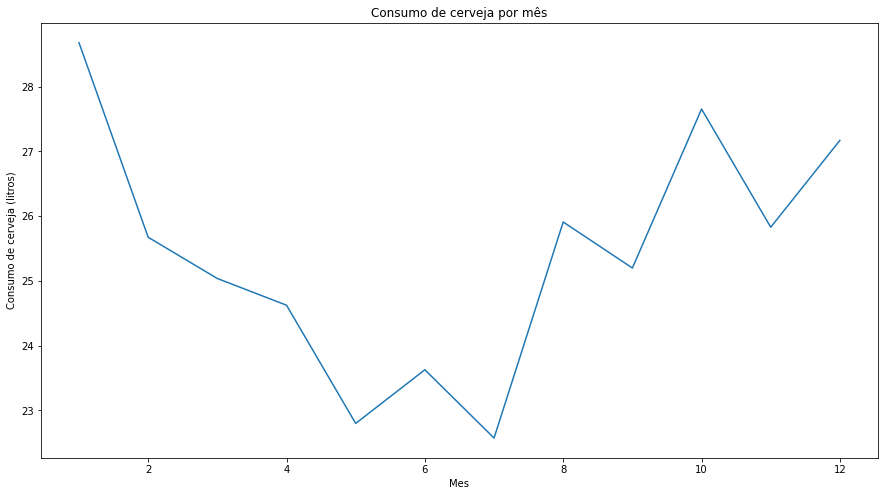

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Mes', y='Consumo de cerveja (litros)', data=df_mes, ci=None)
plt.title('Consumo de cerveja por mês')
plt.show()

<b>O mapa de calor nos ilustra como o sábado e o domingo são os dias de maior consumo de cerveja durante todo o ano para sua média mensal.
<br>
<br>
Percebe-se também que os dias com menor consumo são segunda e quarta-feira, também durante todo o ano para sua média mensal.
<br>
<br>
O Mês de maior consumo foi Janeiro e o de menor consumo foi Julho.
</b>

<h1>Modelagem dos dados</h1>
<br>

In [19]:
df_modelagem = df_principal.copy()
df_modelagem.drop(columns=['Data'], axis=1, inplace=True)

In [20]:
y = df_modelagem['Consumo de cerveja (litros)']
X = df_modelagem.drop('Consumo de cerveja (litros)', axis=1)
X.dtypes

Temperatura Media (C)     float64
Temperatura Minima (C)    float64
Temperatura Maxima (C)    float64
Precipitacao (mm)         float64
Final de Semana             int32
Mes                         int64
Dia                         int64
dtype: object

In [21]:
# Transformando as colunas de inteiro para float, para normatizar os valores para a modelagem de dados
X['Final de Semana'] = X['Final de Semana'].astype('float64')
X['Mes'] = X['Mes'].astype('float64')
X['Dia'] = X['Dia'].astype('float64')
X.dtypes

Temperatura Media (C)     float64
Temperatura Minima (C)    float64
Temperatura Maxima (C)    float64
Precipitacao (mm)         float64
Final de Semana           float64
Mes                       float64
Dia                       float64
dtype: object

In [22]:
# Normalizando os dados
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Mes,Dia
0,1.912508,2.281333,1.365781,-0.419062,-0.631243,-1.602745,-1.673503
1,1.824340,2.493924,1.597722,-0.419062,-0.631243,-1.602745,-1.559818
2,1.131590,1.749853,0.762735,-0.419062,1.584177,-1.602745,-1.446134
3,0.867085,1.430966,0.461212,-0.322294,1.584177,-1.602745,-1.332449
4,0.816703,1.253806,0.391630,-0.419062,-0.631243,-1.602745,-1.218764


In [23]:
# Dividindo os conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=123)

In [24]:
# Criando modelos
modelos = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

for modelo in modelos.values():
    modelo.fit(X_treino, y_treino)

modelo_linear = LinearRegression()
modelo_ridge = Ridge()
modelo_lasso = Lasso()
modelo_linear.fit(X_treino, y_treino)
modelo_ridge.fit(X_treino, y_treino)
modelo_lasso.fit(X_treino, y_treino)

Lasso()

In [25]:
# Verificando a qualidade do modelo com R ao quadrado
# O maior número demonstra ser o melhor modelo
for nome, modelo in modelos.items():
    print(nome + " R^2 Score: {:.4f}".format(modelo.score(X_teste, y_teste)))

Linear Regression R^2 Score: 0.6896
Ridge Regression R^2 Score: 0.6909
Lasso Regression R^2 Score: 0.5763


In [26]:
# Verificando Erro Médio Absoluto
# O menor número demonstra ser o melhor modelo
y_pred_linear = modelo_linear.predict(X_teste)
y_pred_ridge = modelo_ridge.predict(X_teste)
y_pred_lasso = modelo_lasso.predict(X_teste)

print("Erro Médio Absoluto da Regressão Linear: {:.4f}".format(mean_absolute_error(y_teste, y_pred_linear)))
print("Erro Médio Absoluto do modelo Ridge: {:.4f}".format(mean_absolute_error(y_teste, y_pred_ridge)))
print("Erro Médio Absoluto do modelo Lasso: {:.4f}".format(mean_absolute_error(y_teste, y_pred_lasso)))

Erro Médio Absoluto da Regressão Linear: 2.0395
Erro Médio Absoluto do modelo Ridge: 2.0373
Erro Médio Absoluto do modelo Lasso: 2.3299


In [27]:
# Verificando Erro Médio Quadrático
# O menor número demonstra ser o melhor modelo
print("Erro Médio Quadrático da Regressão Linear: {:.4f}".format(mean_squared_error(y_teste, y_pred_linear)))
print("Erro Médio Quadrático do modelo Ridge: {:.4f}".format(mean_squared_error(y_teste, y_pred_ridge)))
print("Erro Médio Quadrático do modelo Lasso: {:.4f}".format(mean_squared_error(y_teste, y_pred_lasso)))

Erro Médio Quadrático da Regressão Linear: 5.8670
Erro Médio Quadrático do modelo Ridge: 5.8426
Erro Médio Quadrático do modelo Lasso: 8.0076


<h1>Conclusão</h1>
<br>
Analisando as métricas dos nossos três modelos, nota-se que o melhor modelo é o <b>Ridge</b>, que é um método de regularização do modelo que tem como principal objetivo suavizar atributos que sejam relacionados uns aos outros e que aumentam o ruído no modelo. Com essa retirada de atributos, há uma estabilidade no resultado.
<br>
<br>
O modelo de Regressão Ridge explica um pouco mais de 69% da variabilidade do consumo de cerveja com os atributos apresentados no conjunto de dados. Este valor fica próximo dos 70%, que é considerado um ótimo valor para um modelo de regressão.